In [2]:
import os
import librosa
import librosa.display
import scipy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing


In [23]:
val = np.random.rand(10, 7)  # Replace this with your actual matrix

# Reshape the matrix to a single row
flat_val = val.T.flatten()

# Print the result
print(flat_val)
print("Shape:", flat_val.shape)

[0.61857875 0.58727922 0.8945422  0.83533756 0.25166274 0.66819974
 0.83740952 0.48089892 0.28645388 0.56419135 0.64594374 0.46130334
 0.03813705 0.4742431  0.22586051 0.66515386 0.55445188 0.03938854
 0.27374582 0.73630055 0.68161956 0.63389529 0.75838906 0.16981569
 0.9415533  0.01948902 0.41621218 0.00576554 0.06523192 0.19011776
 0.33685681 0.38916879 0.64194832 0.77763882 0.83032849 0.31129794
 0.82949321 0.6460759  0.6603653  0.87347857 0.99605961 0.51036352
 0.17464336 0.30130076 0.38915548 0.63676068 0.08807852 0.12469956
 0.8976458  0.41556524 0.54326024 0.79373395 0.56587344 0.2688996
 0.32394596 0.15902636 0.56113758 0.79201291 0.31273233 0.80800025
 0.99726106 0.4885737  0.21759308 0.55046636 0.01071351 0.46981078
 0.68938424 0.94679536 0.49336436 0.69337917]
Shape: (70,)


In [40]:
mfccs = [f"mfcc{i}" for i in range(70)]

data = pd.DataFrame(columns=["folder"]+mfccs) 
data

,folder,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,...,mfcc60,mfcc61,mfcc62,mfcc63,mfcc64,mfcc65,mfcc66,mfcc67,mfcc68,mfcc69


In [51]:
import os
import librosa
import pandas as pd

path = "Songs"
mfccs = [f"mfcc{i}" for i in range(70)]
spec_con=[f"SpecCon{i}" for i in range(4)]
ton=[f"ton{i}" for i in range(6)]
chroma_mean=[f"chr_m{i}" for i in range(12)]
chroma_std=[f"chr_std{i}" for i in range(12)]

data = pd.DataFrame(columns=["folder","rms_avg","rms_max","zcr","tempo","beat_num"]+mfccs+spec_con+ton+chroma_mean+chroma_std) 

def feature_extract(root_folder):
    i = 0
    for folder in os.listdir(path):
        input_files = os.listdir(f"{path}/{folder}")

        for file in input_files:
            print(file)
            x, fs = librosa.load(path + "/" + folder + "/" + file)
            start_time = 60  # 1:00
            end_time = 90    # 2:10
            # Convert time to samples
            start_sample = int(start_time * fs)
            end_sample = int(end_time * fs)
            y = x[start_sample:end_sample]
            print("loaded song")
            print(fs)
            # ### RMS
            rms=librosa.feature.rms(y=x)
            # print(rms)
            ##rms=np.round(rms,1)
            #unique_elements, counts = np.unique(rms[0], return_counts=True)
            rms_max=max(rms[0])
            rms_avg=np.mean(rms[0])

        

            #### Mean-spec centroid

            spectral_centroid = librosa.feature.spectral_centroid(y=x, sr=fs)[0]

            # Calculate the mean of the spectral centroid vector
            mean_spectral_centroid = np.mean(spectral_centroid)

            ###ZCR
       
            zcr=librosa.feature.zero_crossing_rate(x).mean()
            spectral_contrast = librosa.feature.spectral_contrast(y=x,n_bands=4,sr=fs)
            spectral_contrast=spectral_contrast[1:]
            spectral_contrast=np.mean(spectral_contrast, axis=1)
            # print(len(spectral_contrast))
            
            tonnetz = librosa.feature.tonnetz(y=x,sr=fs)
            tonnetz=np.mean(tonnetz, axis=1 )

            chroma = librosa.feature.chroma_stft(y=x, sr=fs,n_chroma=12)

            # # Take the mean along the time axis to get a single vector of chroma features
            c_mean = np.mean(chroma, axis=1)
            c_std = np.std(chroma, axis=1)
            
            # print("----tonnetx  and spec con computed----")
            tempo, beat_frames = librosa.beat.beat_track(y=x,sr=fs)
            # print("tempo computed")

            t = 10
            n_fft = fs * t  # Set your desired window size
            t2 = 5
            # Set hop length based on your preference
            hop_length = fs * t2
            mfcc = librosa.feature.mfcc(y=y, n_mfcc=10, sr=fs, n_fft=n_fft, hop_length=hop_length)
            mfcc = mfcc.T.flatten()

            # Append the MFCC features to the DataFrame
            #["folder","rms_avg","rms_max","zcr","tempo","beat_num"]
            data.at[i,'rms_avg']=rms_avg
            data.at[i,'rms_max']=rms_max
            data.at[i,'zcr']=zcr
            data.at[i,'tempo']=tempo
            data.at[i,'beat_num']=len(beat_frames)
            data.at[i,'folder']=folder
            data.loc[i,mfccs]= mfcc
            data.loc[i,chroma_std]= list(c_std)
            data.loc[i,chroma_mean]= list(c_mean)
            data.loc[i,ton]= list(tonnetz)
            data.loc[i,spec_con]= list(spectral_contrast)
            print(f"---{file}---row inserted")
            i += 1
        

    return data

# Call the function
result_data = feature_extract(path)
print(result_data)


Bank Account.wav
loaded song
22050
---Bank Account.wav---row inserted
Mood feat iann dior.wav
loaded song
22050
---Mood feat iann dior.wav---row inserted
Drowning.wav
loaded song
22050
---Drowning.wav---row inserted
Hello (Official Music Video).wav
loaded song
22050
---Hello (Official Music Video).wav---row inserted
Send My Love (To Your New Lover).wav
loaded song
22050
---Send My Love (To Your New Lover).wav---row inserted
When We Were Young (Live at The Church Studios).wav
loaded song
22050
---When We Were Young (Live at The Church Studios).wav---row inserted
Easy On Me.wav
loaded song
22050
---Easy On Me.wav---row inserted
Better Things.wav
loaded song
22050
---Better Things.wav---row inserted
After School - DIVA MV.wav
loaded song
22050
---After School - DIVA MV.wav---row inserted
Alan Walker - Faded.wav
loaded song
22050
---Alan Walker - Faded.wav---row inserted
Different Kind Of Beautiful.wav
loaded song
22050
---Different Kind Of Beautiful.wav---row inserted
Here.wav
loaded song

In [52]:
result_data

,folder,rms_avg,rms_max,zcr,tempo,beat_num,mfcc0,mfcc1,mfcc2,mfcc3,...,chr_std2,chr_std3,chr_std4,chr_std5,chr_std6,chr_std7,chr_std8,chr_std9,chr_std10,chr_std11
0,21 Savage - Bank Account,0.259354,0.606393,0.053069,151.999081,543,349.8974,136.948853,-34.165169,34.15247,...,0.271525,0.298363,0.303634,0.301353,0.274999,0.235525,0.257558,0.28177,0.296398,0.301407
1,"24kGoldn, iann dior-Mood feat iann dior",0.192319,0.375322,0.074492,92.285156,225,406.637177,111.894409,-1.800933,8.114124,...,0.317632,0.261004,0.251845,0.318091,0.241112,0.320638,0.277198,0.309388,0.334413,0.261596
2,A Boogie Wit da Hoodie - Drowning (feat. Kodak...,0.236818,0.625306,0.092956,129.199219,416,459.26178,97.10762,-8.20603,23.02639,...,0.28855,0.296243,0.248753,0.345382,0.235219,0.337461,0.286977,0.243162,0.278724,0.276997
3,Adele - Hello,0.185376,0.582187,0.072737,161.499023,897,181.041946,170.827423,4.774619,22.550602,...,0.277423,0.330522,0.261035,0.334234,0.254671,0.287889,0.354595,0.272649,0.359954,0.26116
4,Adele - Send My Love (To Your New Lover),0.250057,0.582455,0.067323,161.499023,595,451.799103,87.469093,5.800037,19.995876,...,0.361831,0.303095,0.314011,0.293306,0.356054,0.307411,0.277135,0.327221,0.278813,0.356955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,Zella Day - Hypnotic,0.139896,0.309532,0.067335,80.749512,246,405.741272,106.705879,-21.962143,10.28797,...,0.301204,0.271815,0.287489,0.292807,0.370358,0.30918,0.304122,0.318661,0.278061,0.316921
495,Zella Day - Hypnotic - Vanic Remix,0.243558,0.568632,0.114291,161.499023,739,427.11441,75.426529,-10.455714,-8.097612,...,0.314578,0.288517,0.280903,0.262936,0.299957,0.252368,0.312303,0.345515,0.279331,0.326239
496,Zella Day - Shadow Preachers,0.069926,0.145558,0.076395,80.749512,195,235.176773,93.142303,15.547757,34.298264,...,0.234112,0.264719,0.234103,0.354256,0.2204,0.281845,0.319043,0.259824,0.307883,0.251237
497,Zolita - Explosion,0.281902,0.674103,0.036244,123.046875,404,387.43396,167.624878,-3.59982,9.636574,...,0.360698,0.281364,0.189134,0.331588,0.217726,0.29594,0.244886,0.35783,0.339537,0.267411


In [53]:
df2=pd.read_csv("AllLabels.csv")
df2=df2.drop(columns="cleaned_lyrics")
df=pd.merge(result_data,df2,on='folder')
df

,folder,rms_avg,rms_max,zcr,tempo,beat_num,mfcc0,mfcc1,mfcc2,mfcc3,...,chr_std3,chr_std4,chr_std5,chr_std6,chr_std7,chr_std8,chr_std9,chr_std10,chr_std11,label
0,21 Savage - Bank Account,0.259354,0.606393,0.053069,151.999081,543,349.8974,136.948853,-34.165169,34.15247,...,0.298363,0.303634,0.301353,0.274999,0.235525,0.257558,0.28177,0.296398,0.301407,<pad> anger
1,"24kGoldn, iann dior-Mood feat iann dior",0.192319,0.375322,0.074492,92.285156,225,406.637177,111.894409,-1.800933,8.114124,...,0.261004,0.251845,0.318091,0.241112,0.320638,0.277198,0.309388,0.334413,0.261596,<pad> joy
2,Adele - Hello,0.185376,0.582187,0.072737,161.499023,897,181.041946,170.827423,4.774619,22.550602,...,0.330522,0.261035,0.334234,0.254671,0.287889,0.354595,0.272649,0.359954,0.26116,<pad> sadness
3,Adele - When We Were Young,0.185296,0.477624,0.06127,143.554688,809,362.215668,124.673676,-2.423059,31.57132,...,0.341099,0.263886,0.327393,0.270021,0.335513,0.331415,0.308683,0.337107,0.277075,<pad> love
4,Adele-Easy On Me,0.212144,0.477722,0.063193,143.554688,498,384.463715,96.385468,30.711338,27.018154,...,0.208195,0.259131,0.391427,0.222069,0.325607,0.218177,0.318087,0.344576,0.254679,<pad> joy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,Zella Day - Hypnotic,0.139896,0.309532,0.067335,80.749512,246,405.741272,106.705879,-21.962143,10.28797,...,0.271815,0.287489,0.292807,0.370358,0.30918,0.304122,0.318661,0.278061,0.316921,<pad> anger
440,Zella Day - Hypnotic - Vanic Remix,0.243558,0.568632,0.114291,161.499023,739,427.11441,75.426529,-10.455714,-8.097612,...,0.288517,0.280903,0.262936,0.299957,0.252368,0.312303,0.345515,0.279331,0.326239,<pad> anger
441,Zella Day - Shadow Preachers,0.069926,0.145558,0.076395,80.749512,195,235.176773,93.142303,15.547757,34.298264,...,0.264719,0.234103,0.354256,0.2204,0.281845,0.319043,0.259824,0.307883,0.251237,<pad> sadness
442,Zolita - Explosion,0.281902,0.674103,0.036244,123.046875,404,387.43396,167.624878,-3.59982,9.636574,...,0.281364,0.189134,0.331588,0.217726,0.29594,0.244886,0.35783,0.339537,0.267411,<pad> joy


In [48]:
df.to_csv("PLus_Mffcs.csv",index=False)

In [19]:
path = "Songs"
k=[]
mfccs=[f"mfcc{i}" for i in range(10)]
spec_con=[f"SpecCon{i}" for i in range(4)]
ton=[f"ton{i}" for i in range(6)]
chroma_arr=[f"chr{i}" for i in range(12)]
rms=["rms_mode","rms_max","rms_avg"]

data=pd.DataFrame(columns=['folder','tempo','zcr','beats','spec_centroid']+ rms+ mfccs+ spec_con+ ton+chroma_arr )   
def feature_extract(root_folder):
    i=0
    for folder in os.listdir(path):
        input_file = os.listdir(f"{path}/{folder}")

        for file in input_file:
            print(file)
            x, fs = librosa.load(path+"/"+folder+"/"+file)
            start_time = 60  # 1:00
            end_time = 0    # 2:10
            # Convert time to samples
            start_sample = int(start_time * fs)
            end_sample = int(end_time * fs)
            y = x[start_sample:end_sample]
            print("loaded song")
            print(fs)

            # ### RMS
            # rms=librosa.feature.rms(y=x)
            # print(rms)
            # #rms=np.round(rms,1)
            # unique_elements, counts = np.unique(rms[0], return_counts=True)
            # rms_max=max(rms[0])
            # rms_avg=np.mean(rms[0])

            # # Find the index of the maximum count
            # max_count_index = np.argmax(counts)
            # # The most common element(s)
            # mode_value = unique_elements[max_count_index]

            # #### Mean-spec centroid

            # spectral_centroid = librosa.feature.spectral_centroid(y=x, sr=fs)[0]

            # # Calculate the mean of the spectral centroid vector
            # mean_spectral_centroid = np.mean(spectral_centroid)

            # ###ZCR
       
            # zcr=librosa.feature.zero_crossing_rate(x).mean()
            # spectral_contrast = librosa.feature.spectral_contrast(y=x,n_bands=4,sr=fs)
            # spectral_contrast=spectral_contrast[1:]
            # spectral_contrast=np.mean(spectral_contrast, axis=1)
            # print(len(spectral_contrast))
            
            # tonnetz = librosa.feature.tonnetz(y=x,sr=fs)
            # tonnetz=np.mean(tonnetz, axis=1 )

            # chroma = librosa.feature.chroma_stft(y=x, sr=fs,n_chroma=12)

            # # Take the mean along the time axis to get a single vector of chroma features
            # chroma_mean = np.mean(chroma, axis=1)
            # #chroma_std = np.std(chroma, axis=1)
            
            # print("----tonnetx  and spec con computed----")
            # tempo, beat_frames = librosa.beat.beat_track(y=x,sr=fs)
            # print("tempo computed")

            n_fft = 220500  # Set your desired window size

            # Set hop length based on your preference
            hop_length = 110250
            mfcc=librosa.feature.mfcc(y=x,n_mfcc=10,sr=fs, n_fft=n_fft,hop_length=hop_length)
            #mfcc=mfcc.mean(axis=1)
            print(mfcc.shape)

            # row=[folder,tempo,zcr,len(beat_frames),mean_spectral_centroid,mode_value,rms_max,rms_avg]
            # row=row+list(mfcc)+list(spectral_contrast)+list(tonnetz)+list(chroma_mean)
            
            # data.loc[i]=row
            # print("---{file}---row inserted")
            # i+=1
        break
        
    

    return data, rms

df1, rms =feature_extract(path)

Bank Account.wav
loaded song
22050
(10, 7)


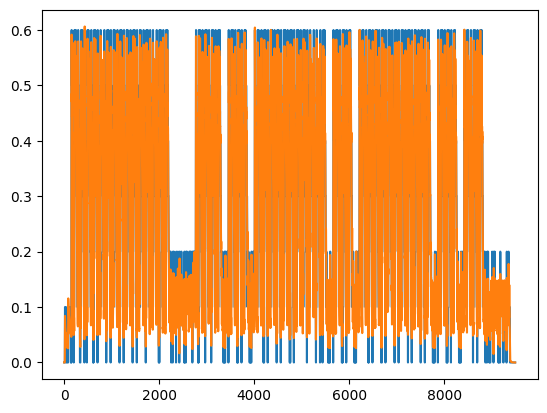

In [14]:
plt.plot(np.round(rms[0], 1))
plt.plot(rms[0])

In [4]:
df1.to_csv("allfeat-2.csv",index=False)

In [3]:
# path = "videos-2"
# k=[]
# mfccs=[f"mfcc{i}" for i in range(10)]
# spec_con=[f"SpecCon{i}" for i in range(4)]
# ton=[f"ton{i}" for i in range(6)]

# data=pd.DataFrame(columns=['folder','tempo','zcr','beats']+ mfccs+ spec_con+ ton )   
# def feature_extract(root_folder):
#     i=0
#     for folder in os.listdir(path):
#         input_file = os.listdir(f"{path}/{folder}")

#         for file in input_file:
#             print(file)
#             x, fs = librosa.load(path+"/"+folder+"/"+file)
#             print("loaded song")
#             zcr=librosa.feature.zero_crossing_rate(x).mean()
#             spectral_contrast = librosa.feature.spectral_contrast(y=x,n_bands=4)
#             spectral_contrast=spectral_contrast[1:]
            
#             spectral_contrast=np.mean(spectral_contrast, axis=1)
#             print(len(spectral_contrast))
#             tonnetz = librosa.feature.tonnetz(y=x)
#             tonnetz=np.mean(tonnetz, axis=1 )
            
#             print("----tonnetx  and spec con computed----")
#             tempo, beat_frames = librosa.beat.beat_track(y=x)
#             print("tempo computed")
        
#             mfcc=librosa.feature.mfcc(y=x,n_mfcc=10)
#             mfcc=mfcc.mean(axis=1)
#             print("mfcc computed")

#             row=[folder,tempo,len(beat_frames),zcr]
#             row=row+list(mfcc)+list(spectral_contrast)+list(tonnetz)
            
#             data.loc[i]=row
#             print("---{file}---row inserted")
#             i+=1
        
    

#     return data


# data= feature_extract(path)
    


Mood feat iann dior.wav
loaded song
4
----tonnetx  and spec con computed----
tempo computed
mfcc computed
---{file}---row inserted
Easy On Me.wav
loaded song
4
----tonnetx  and spec con computed----
tempo computed
mfcc computed
---{file}---row inserted
Better Things.wav
loaded song
4
----tonnetx  and spec con computed----
tempo computed
mfcc computed
---{file}---row inserted
Different Kind Of Beautiful.wav
loaded song
4
----tonnetx  and spec con computed----
tempo computed
mfcc computed
---{file}---row inserted
Girl From Rio.wav
loaded song
4
----tonnetx  and spec con computed----
tempo computed
mfcc computed
---{file}---row inserted
UNHEALTHY feat Shania Twain.wav
loaded song
4
----tonnetx  and spec con computed----
tempo computed
mfcc computed
---{file}---row inserted
3435 Remix feat Doja Cat Megan Thee Stallion - Remix.wav
loaded song
4
----tonnetx  and spec con computed----
tempo computed
mfcc computed
---{file}---row inserted
Stuck with U with Justin Bieber.wav
loaded song
4
----t

In [82]:
df1.to_csv('./allfs.csv',index=False)

In [4]:
path="videos-2"
df=pd.DataFrame(columns=["folder","rms_mode","rms_max","rms_avg"])
i=0
for folder in os.listdir(path):
    input_file = os.listdir(f"{path}/{folder}")

    for file in input_file:
        print(file)
        x, fs = librosa.load(path+"/"+folder+"/"+file)
        rms=librosa.feature.rms(y=x)
        rms=np.round(rms,1)
        unique_elements, counts = np.unique(rms[0], return_counts=True)
        rms_max=max(rms[0])
        rms_avg=np.mean(rms[0])
        # Find the index of the maximum count
        max_count_index = np.argmax(counts)
        # The most common element(s)
        mode_value = unique_elements[max_count_index]

        df.loc[i]=[folder,mode_value,rms_max,rms_avg]
        i+=1

         
         
         


Mood feat iann dior.wav
Easy On Me.wav
Better Things.wav
Different Kind Of Beautiful.wav
Girl From Rio.wav
UNHEALTHY feat Shania Twain.wav
3435 Remix feat Doja Cat Megan Thee Stallion - Remix.wav
Stuck with U with Justin Bieber.wav
3435.wav
positions.wav
pov.wav
test drive.wav
ROXANNE.wav
Ojitos Lindos.wav
Me Porto Bonito.wav
DKITI.wav
Tarot.wav
Safaera.wav
Party.wav
LA NOCHE DE ANOCHE.wav
Efecto.wav
Moscow Mule.wav
Tit Me Pregunt.wav
Yonaguni.wav
Religiously.wav
One in a Million.wav
MAMIII.wav
Build a Bitch.wav
Supalonely feat Gus Dapperton.wav
What Was.wav
lovely with Khalid.wav
bad guy.wav
everything i wanted.wav
Happier Than Ever.wav
Lost Cause.wav
Therefore I Am.wav
What Was I Made For.wav
Your Power.wav
Quevedo Bzrp Music Sessions Vol 52.wav
RITMO Bad Boys For Life.wav
GIRL LIKE ME.wav
Leave The Door Open.wav
Skate.wav
Butter.wav
Dynamite.wav
Permission to Dance.wav
Big 7.wav
City Boys.wav
Bam Bam feat Ed Sheeran.wav
Bongos feat Megan Thee Stallion.wav
WAP feat Megan Thee Stallio

In [5]:
df

,folder,rms_mode,rms_max,rms_avg
0,"24kGoldn, iann dior-Mood feat iann dior",0.3,0.4,0.195309
1,Adele-Easy On Me,0.2,0.5,0.211292
2,aespa-Better Things,0.2,0.5,0.194475
3,Alec Benjamin-Different Kind Of Beautiful,0.2,0.6,0.249628
4,Anitta-Girl From Rio,0.1,0.6,0.211465
...,...,...,...,...
235,"WILLOW, Travis Barker-t r a n s p a r e n t s ...",0.2,0.3,0.167948
236,"Yandel, Myke Towers-Borracho y Loco",0.3,0.7,0.280820
237,"Yng Lvcas, Peso Pluma-La Bebe - Remix",0.1,0.6,0.175467
238,"Young Thug, Drake-Oh U Went feat Drake",0.2,0.6,0.216808


In [6]:
df_merged=pd.merge(df,data,on="folder")
df_merged

,folder,rms_mode,rms_max,rms_avg,tempo,zcr,beats,mfcc0,mfcc1,mfcc2,...,SpecCon0,SpecCon1,SpecCon2,SpecCon3,ton0,ton1,ton2,ton3,ton4,ton5
0,"24kGoldn, iann dior-Mood feat iann dior",0.3,0.4,0.195309,92.285156,225,0.074492,-94.671288,101.135872,-3.639756,...,15.749348,19.046993,18.760799,43.466371,-0.044556,0.137569,0.021685,-0.029546,0.012012,-0.010437
1,Adele-Easy On Me,0.2,0.5,0.211292,143.554688,498,0.063193,-147.020966,120.755402,21.901266,...,19.165881,23.053430,25.666142,45.617874,-0.013692,0.255807,-0.126497,-0.026275,0.002958,-0.011856
2,aespa-Better Things,0.2,0.5,0.194475,117.453835,439,0.093073,-95.111298,87.126213,-1.556197,...,16.198299,18.660265,18.240728,39.053651,0.087274,0.061502,0.011491,-0.026066,-0.007314,-0.005879
3,Alec Benjamin-Different Kind Of Beautiful,0.2,0.6,0.249628,107.666016,348,0.062988,-113.869339,114.681618,8.415601,...,16.434898,19.999000,21.838276,42.675568,0.120463,0.098307,-0.062427,0.064611,-0.019312,0.009838
4,Anitta-Girl From Rio,0.1,0.6,0.211465,143.554688,479,0.070228,-133.776886,81.492928,-6.085178,...,17.009307,20.216336,19.842182,38.243474,0.044809,0.094478,-0.007058,0.045050,0.004054,-0.020228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,"WILLOW, Travis Barker-t r a n s p a r e n t s ...",0.2,0.3,0.167948,89.102909,256,0.084486,-88.364304,87.730133,2.871025,...,14.251842,18.328702,20.419696,40.402302,0.064721,-0.060264,0.017274,-0.019390,0.013812,-0.008125
236,"Yandel, Myke Towers-Borracho y Loco",0.3,0.7,0.280820,172.265625,521,0.078997,-86.980110,88.682251,15.434509,...,15.762563,18.819804,20.561299,40.496087,-0.016989,-0.051869,0.012209,0.007598,0.011842,0.021544
237,"Yng Lvcas, Peso Pluma-La Bebe - Remix",0.1,0.6,0.175467,172.265625,586,0.076067,-144.986038,85.996445,0.506962,...,17.531520,20.267576,19.057988,40.643437,0.074284,0.133991,0.001128,-0.073727,-0.016814,-0.033682
238,"Young Thug, Drake-Oh U Went feat Drake",0.2,0.6,0.216808,135.999178,418,0.083260,-96.758003,98.898232,10.016735,...,14.281159,18.724522,18.905761,41.728906,0.057777,0.087760,0.002450,-0.025979,0.009914,-0.007841


In [7]:
df_merged.to_csv("AudioFeatures-2.csv",index=False)